In [2]:
import numpy as np
import pandas as pd

# scale
from sklearn.preprocessing import StandardScaler

# model selectiion
from sklearn.model_selection import StratifiedKFold, cross_val_score

# rf
from sklearn.ensemble import RandomForestClassifier
# mlp
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.metrics import accuracy_score, classification_report

# load/save models
from sklearn.externals import joblib

# signed wilcoxon test
from scipy.stats import wilcoxon

In [4]:
# plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})
fontdict = {'fontsize': 18,
           'weight' : 'bold'}
palette = palette=['green','orange','brown','blue', 'red', 'black', 'yellow']
sns.set()

### load data

In [5]:
# save Scaler
scaler = joblib.load('./data/preprocessamento/zscaler.pkl') 

# save models
X_ros = np.genfromtxt('./data/preprocessamento/X_rox', delimiter=' ')
y_ros = np.genfromtxt('./data/preprocessamento/y_rox', delimiter=' ')

X_smt = np.genfromtxt('./data/preprocessamento/X_smt', delimiter=' ')
y_smt = np.genfromtxt('./data/preprocessamento/y_smt', delimiter=' ')

### test data
X_test = pd.read_csv('./data/preprocessamento/X_test', header=None, sep=' ')
y_test = pd.read_csv('./data/preprocessamento/y_test', header=None, sep=' ')

### Gerando as medias

In [11]:
means = {'mlp': [], 'rf': []}
X_train_scl, X_test_scl = scaler.transform(X_ros), scaler.transform(X_test)

for i in range(10):
    print("Conjunto: ", i)
    print(means)
    # clfs
    mlp = MLPClassifier(activation='relu', solver='adam', early_stopping=True, 
                        max_iter=200, batch_size=16, validation_fraction=0.1,
                        hidden_layer_sizes=(100))
    rf = RandomForestClassifier(n_estimators=10 , criterion='gini')
    # kfold
    random_state = np.random.randint(2000)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
    
    print('RF')
    means['rf'].append(cross_val_score(rf, X_train_scl, y_ros, cv=kfold).mean())
    print('MLP')
    means['mlp'].append(cross_val_score(mlp, X_ros, y_ros, cv=kfold, n_jobs=2).mean())
    print(means)

Conjunto:  0
{'mlp': [], 'rf': []}
RF
MLP
{'mlp': [0.9996481699894757], 'rf': [0.9999790568894322]}
Conjunto:  1
{'mlp': [0.9996481699894757], 'rf': [0.9999790568894322]}
RF
MLP
{'mlp': [0.9996481699894757, 0.9997570724449607], 'rf': [0.9999790568894322, 0.9999916237383257]}
Conjunto:  2
{'mlp': [0.9996481699894757, 0.9997570724449607], 'rf': [0.9999790568894322, 0.9999916237383257]}
RF
MLP
{'mlp': [0.9996481699894757, 0.9997570724449607, 0.9996649274255878], 'rf': [0.9999790568894322, 0.9999916237383257, 0.999979059345814]}
Conjunto:  3
{'mlp': [0.9996481699894757, 0.9997570724449607, 0.9996649274255878], 'rf': [0.9999790568894322, 0.9999916237383257, 0.999979059345814]}
RF
MLP
{'mlp': [0.9996481699894757, 0.9997570724449607, 0.9996649274255878, 0.9997277481599551], 'rf': [0.9999790568894322, 0.9999916237383257, 0.999979059345814, 0.9999623043660835]}
Conjunto:  4
{'mlp': [0.9996481699894757, 0.9997570724449607, 0.9996649274255878, 0.9997277481599551], 'rf': [0.9999790568894322, 0.999

### Wilcoxon Test

In [12]:
wilcoxon(means['mlp'], means['rf'])

WilcoxonResult(statistic=0.0, pvalue=0.005062032126267864)

### Acuracia - Boxplot

In [58]:
bp = pd.DataFrame([means['mlp'], means['rf']]).T
bp = bp.rename({0: 'MLP', 1: 'Random Forest'}, axis=1)
bp

,MLP,Random Forest
0,0.999648,0.999979
1,0.999757,0.999992
2,0.999665,0.999979
3,0.999728,0.999962
4,0.999761,0.999971
5,0.999715,0.999979
6,0.999736,0.999983
7,0.999698,0.999979
8,0.999765,0.999966
9,0.999757,0.999987


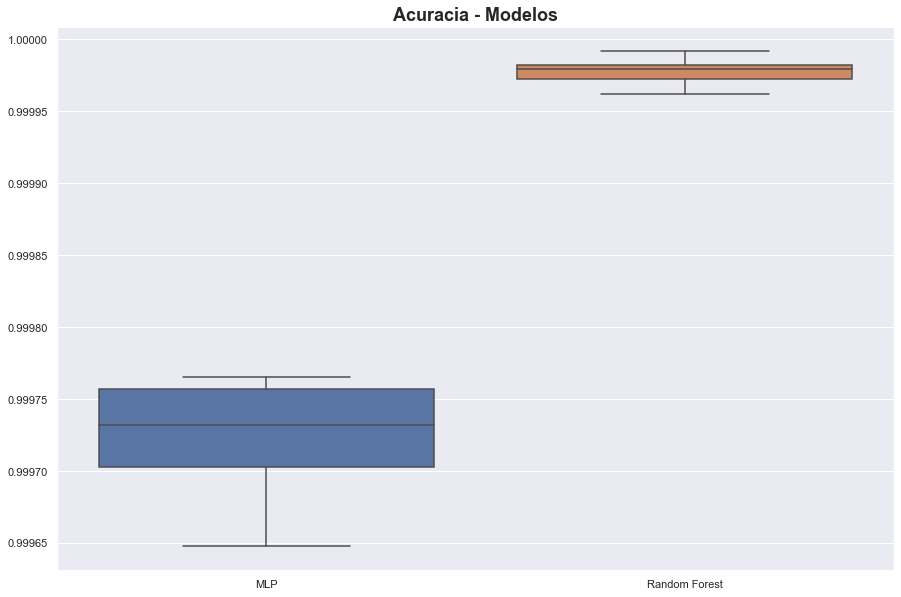

In [61]:
g = sns.boxplot(data=bp)
g.set_title('Acuracia - Modelos', fontdict=fontdict);